In [11]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
import zipfile
import pathlib
import matplotlib.image as mpimg

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# each image is an array of individual img arrays :o
import pathlib
img_height = 128
img_width = 128
batch_size = 32

full_path = os.path.abspath("/content/drive/MyDrive/DataMiningProject")
print(full_path)

# parent_dir = pathlib.Path(data_dir).with_suffix('').parent
# data_dir = parent_dir / 'animals'
# print(data_dir)

train_ds = tf.keras.utils.image_dataset_from_directory(directory=full_path, labels='inferred', validation_split=0.15, subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(directory=full_path, labels='inferred', validation_split=0.15, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)

/content/drive/MyDrive/DataMiningProject
Found 6025 files belonging to 3 classes.
Using 5122 files for training.
Found 6025 files belonging to 3 classes.
Using 903 files for validation.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [ ]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
16/16 [==============================] - 163s 3s/step - loss: 2.2104 - accuracy: 0.1765 - val_loss: 1.9960 - val_accuracy: 0.2667
Epoch 2/25
16/16 [==============================] - 9s 569ms/step - loss: 1.5304 - accuracy: 0.4588 - val_loss: 1.8818 - val_accuracy: 0.3333
Epoch 3/25
16/16 [==============================] - 8s 485ms/step - loss: 0.9515 - accuracy: 0.6941 - val_loss: 1.8892 - val_accuracy: 0.4333
Epoch 4/25
16/16 [==============================] - 8s 509ms/step - loss: 0.6217 - accuracy: 0.8118 - val_loss: 1.7274 - val_accuracy: 0.4778
Epoch 5/25
16/16 [==============================] - 9s 577ms/step - loss: 0.2887 - accuracy: 0.9039 - val_loss: 1.9412 - val_accuracy: 0.5111
Epoch 6/25
16/16 [==============================] - 8s 483ms/step - loss: 0.1010 - accuracy: 0.9725 - val_loss: 2.2213 - val_accuracy: 0.5556
Epoch 7/25
16/16 [==============================] - 9s 576ms/step - loss: 0.0278 - accuracy: 1.0000 - val_loss: 2.1729 - val_accuracy: 0.5444
Epoch 8

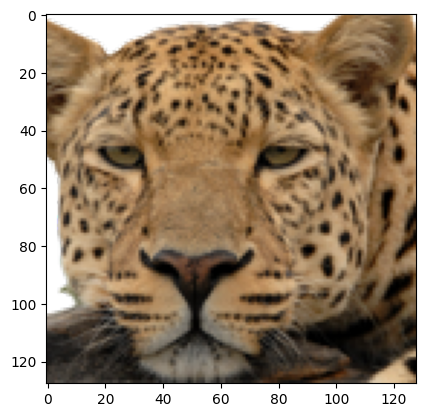

In [ ]:
full_path = os.path.abspath("drive/Shareddrives/CSC_422_Project/animalsSubset_10classes")

imgPath = f'{full_path}/leopard/0eb956c38c.png'

img = mpimg.imread(imgPath) #Replace "image.jpg" with the path of your image
plt.imshow(img)

In [ ]:
img = tf.keras.utils.load_img(imgPath, target_size=(img_height, img_width))
img_array = tf.expand_dims(img, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is most likely a(n) {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 142ms/step
This image is most likely a(n) leopard with a 99.97 percent confidence.
